## Black Friday Sales Prediction
This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550,069 rows and 12 columns.

### Problem: Predict purchase amount.

**Data Overview**
Dataset has 550068 rows (transactions) and 12 columns (features) as described below:

- `User_ID:` Unique ID of the user. There are a total of 5891 users in the dataset.
- `Product_ID:` Unique ID of the product. There are a total of 3631 products in the dataset.
- `Gender:` indicates the gender of the person making the transaction.
- `Age:` indicates the age group of the person making the transaction.
- `Occupation:` shows the occupation of the user, already labeled with numbers 0 to 20.
- `City_Category:` User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.
- `Stay_In_Current_City_Years:` Indicates how long the users has lived in this city.
- `Marital_Status:` is 0 if the user is not married and 1 otherwise.
- `Product_Category_1 to _3:` Category of the product. All 3 are already labaled with numbers.
- `Purchase:` Purchase amount.

## Importing Libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

# To display all the coloumn of dataset
pd.pandas.set_option('display.max_columns', None)


## Importing the dataset

In [57]:
df = pd.read_csv("Data\BlackFridaySales.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [58]:
df.shape

(550068, 12)

## Exploratory Data Analysis (EDA)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [60]:
(df.describe()).round(2)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.00,550068.00,550068.00,550068.00,376430.00,166821.00,550068.00
mean,1003028.84,8.08,0.41,5.40,9.84,12.67,9263.97
std,1727.59,6.52,0.49,3.94,5.09,4.13,5023.07
min,1000001.00,0.00,0.00,1.00,2.00,3.00,12.00
25%,1001516.00,2.00,0.00,1.00,5.00,9.00,5823.00
50%,1003077.00,7.00,0.00,5.00,9.00,14.00,8047.00
75%,1004478.00,14.00,1.00,8.00,15.00,16.00,12054.00
max,1006040.00,20.00,1.00,20.00,18.00,18.00,23961.00


int64      5
object     5
float64    2
dtype: int64


Text(0.5, 1.0, 'type of our data')

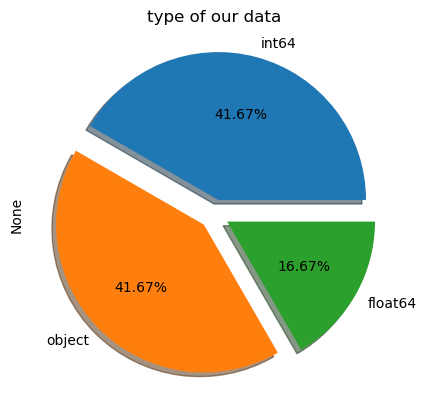

In [61]:
print(df.dtypes.value_counts())
df.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('type of our data')

In [62]:
# Numerical Coloumns of Dataset

num_cols = [f for f in df.columns if df.dtypes[f] != 'object']
print(f"Numerical columns are: {num_cols}")

Numerical columns are: ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


In [63]:
# Categorical Coloumns of Dataset

cat_cols = [f for f in df.columns if df.dtypes[f] == 'object']
print(f"Numerical columns are: {cat_cols}")

Numerical columns are: ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


In [64]:
# Checking for null values 
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [65]:
# Checking for null values
missing_values = df.isnull().sum() / len(df) 
missing_values = (missing_values[missing_values > 0]*100).round(3)
missing_values.apply(lambda x : str(x)+" %")

Product_Category_2    31.567 %
Product_Category_3    69.673 %
dtype: object

<Axes: ylabel='None'>

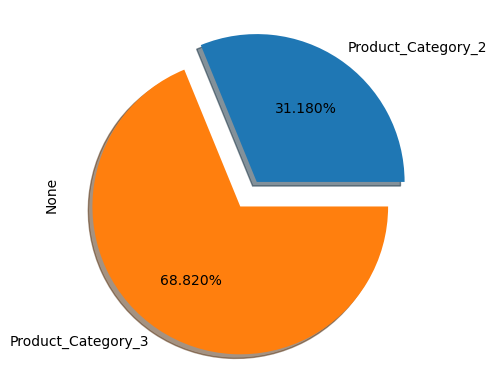

In [66]:
missing_values.plot.pie(explode=[0.1,0.1],autopct='%.3f%%',shadow=True)
# plt.xlabel("Percentage of missing values ")
# plt.show()

In [67]:
# We will replace null value of `Product_Category_2` with median of the column

median = df['Product_Category_2'].median()
df['Product_Category_2'].fillna(median, inplace=True)

In [68]:
df['Product_Category_2'].isnull().any() # Check that now `Product_Category_2` has no null value

False

In [69]:
# almost 70% of the data is missing in `Product_Category_3`, So we will drop it.

df.drop('Product_Category_3', axis=1,inplace=True) 

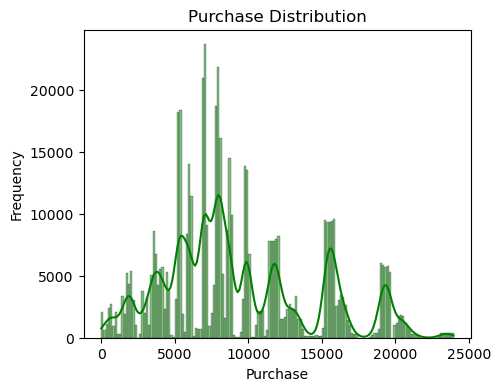

In [70]:
# # Target Variable analysis 

plt.figure(figsize=(5,4))
sns.histplot(data=df, x='Purchase', color='green', kde=True)
plt.title("Purchase Distribution")
plt.xlabel("Purchase")
plt.ylabel("Frequency")
plt.show()

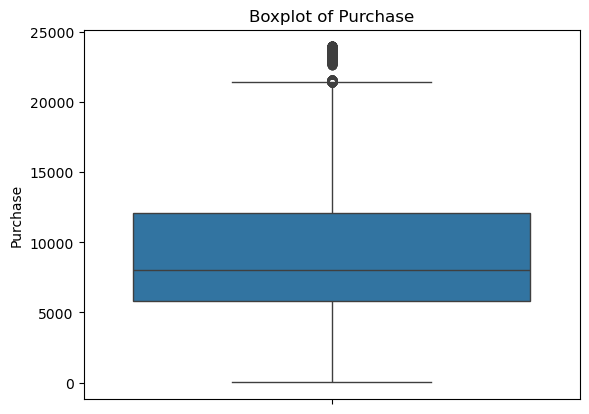

In [71]:
sns.boxplot(df["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

We can observe that purchase amount is repeating for many customers.This may be because on Black Friday many are buying discounted products in large numbers and kind of follows a Gaussian Distribution.

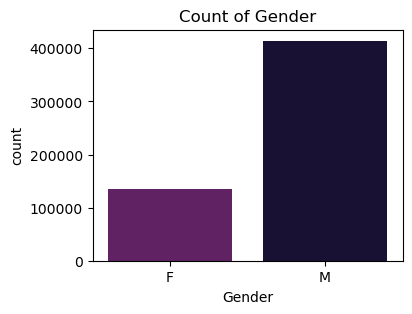

In [72]:
# Gender
plt.figure(figsize=(4,3))
color = list(cm.inferno_r(np.linspace(.7, .9, 2)))
sns.countplot(data= df, x= 'Gender', hue='Gender', palette=color, legend=False)
plt.title("Count of Gender")
plt.show()

In [73]:
df.groupby('Gender').mean()['Purchase'] 

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

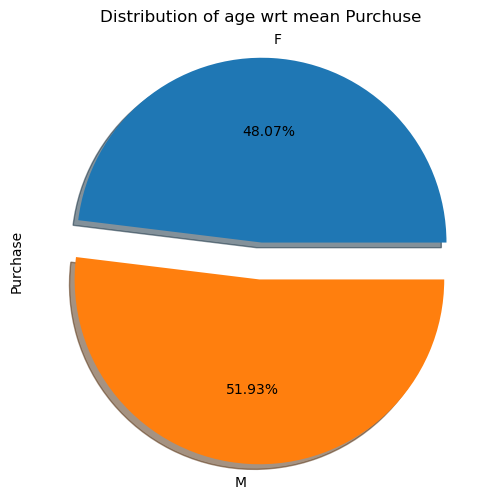

In [74]:
plt.figure(figsize=(6,6))
df.groupby('Gender').mean()['Purchase'].plot.pie(explode=[0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title("Distribution of age wrt mean Purchuse")
plt.show()

Male customer have more rate of Purchuse than Female customer.

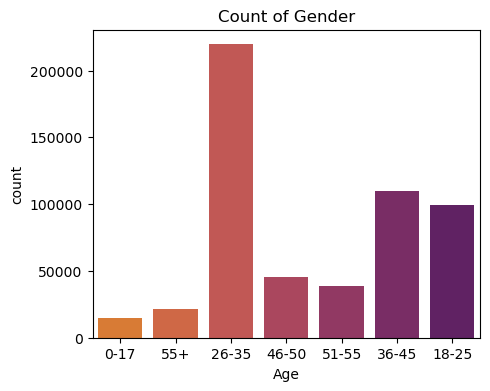

In [75]:
# Age

plt.figure(figsize=(5,4))
color = list(cm.inferno_r(np.linspace(.3, .7, 7)))
sns.countplot(data= df, x= 'Age', hue='Age', palette=color, legend=False)
plt.title("Count of Gender")
plt.show()

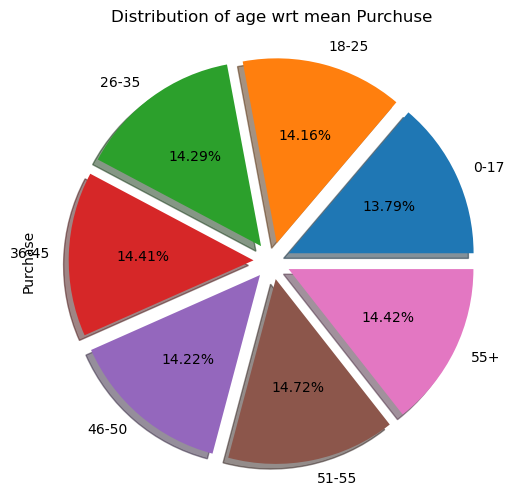

In [76]:
plt.figure(figsize=(6,6))
df.groupby('Age').mean()['Purchase'].plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title("Distribution of age wrt mean Purchuse")
plt.show()

26-35 Age group customer are more frequent than other age group. And Age group 51-55 have the highest avg purchase rate.

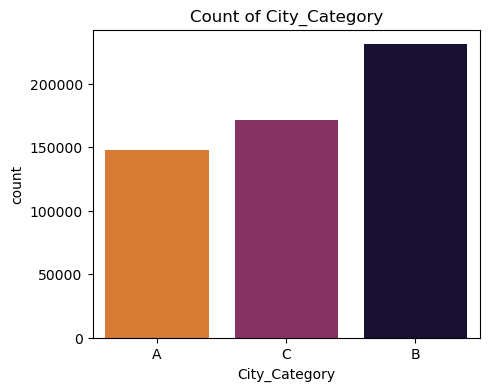

In [77]:
# City_Category	
plt.figure(figsize=(5,4))
color = list(cm.inferno_r(np.linspace(.3, .9, 3)))
sns.countplot(data= df, x= 'City_Category', hue='City_Category', palette=color, legend=False)
plt.title("Count of City_Category")
plt.show()

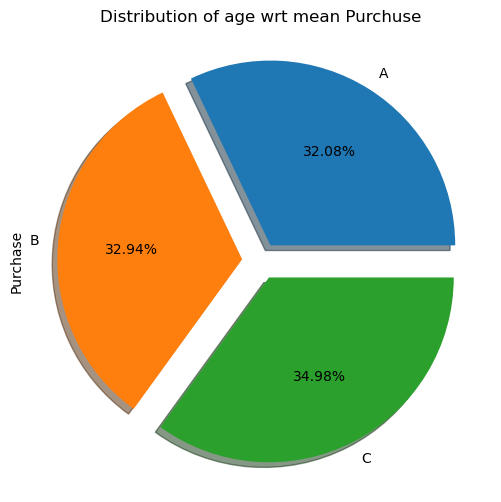

In [78]:
plt.figure(figsize=(6,6))
df.groupby('City_Category').mean()['Purchase'].plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title("Distribution of age wrt mean Purchuse")
plt.show()

City category C has the highest rate of purchase.

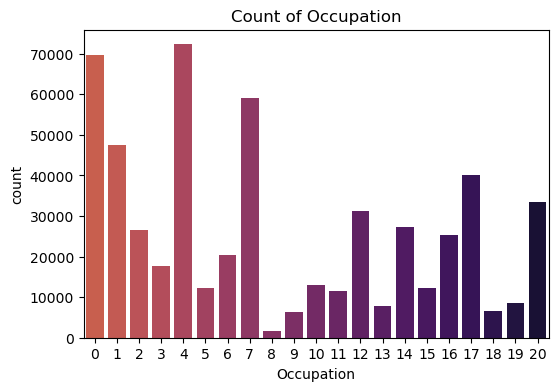

In [79]:
# Occupation
plt.figure(figsize=(6,4))
color = list(cm.inferno_r(np.linspace(.4, .9, 21)))
sns.countplot(data= df, x= 'Occupation',hue= 'Occupation', palette=color, legend=False)
plt.title("Count of Occupation")
plt.show()

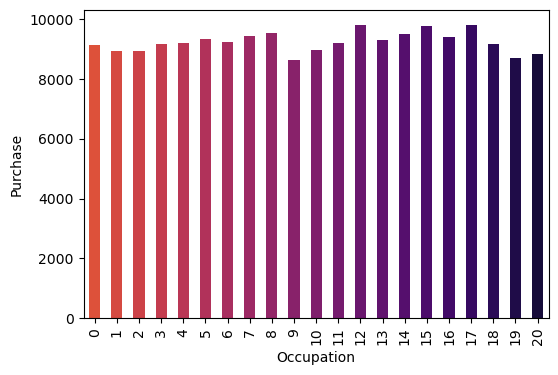

In [80]:
color = cm.inferno_r(np.linspace(.4, .9, 21))
plt.figure(figsize=(6,4))
df.groupby('Occupation').mean()['Purchase'].plot(kind='bar', color=color)
plt.ylabel("Purchase")
plt.show()

There are 21 category of occupation persent. All occuation has more or less same avg. purchase.

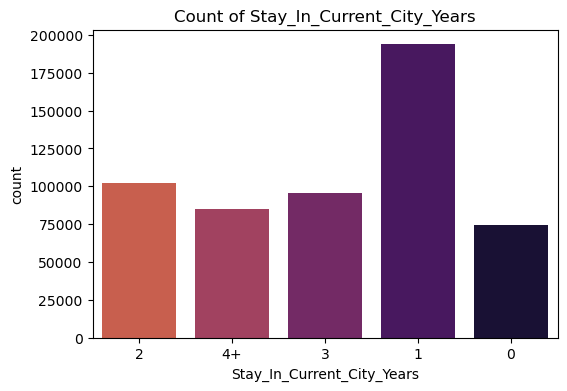

In [81]:
# Stay_In_Current_City_Years	 

plt.figure(figsize=(6,4))
color = list(cm.inferno_r(np.linspace(.4, .9, 5)))
sns.countplot(data= df, x= 'Stay_In_Current_City_Years',hue= 'Stay_In_Current_City_Years', palette=color, legend=False)
plt.title("Count of Stay_In_Current_City_Years")
plt.show()

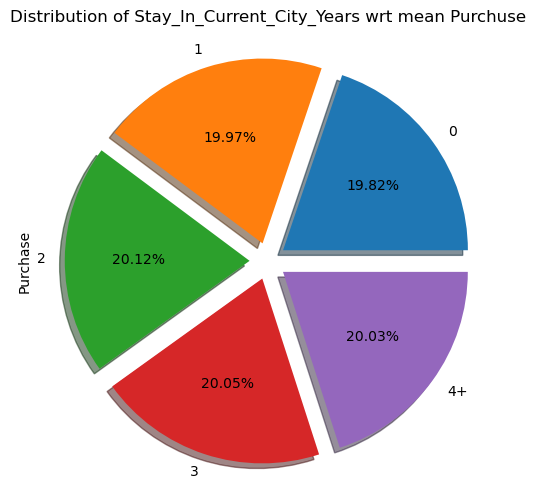

In [82]:
plt.figure(figsize=(6,6))
df.groupby('Stay_In_Current_City_Years').mean()['Purchase'].plot.pie(explode=[0.1,0.1,0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title("Distribution of Stay_In_Current_City_Years wrt mean Purchuse")
plt.show()

Most of the customer stay in the city more than 1 year. Customer stay in the city fir 2 years has the more purchase rate.

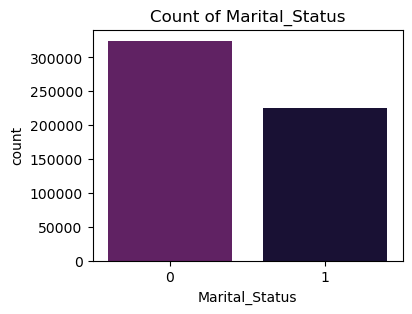

In [83]:
# Marital_Status
plt.figure(figsize=(4,3))
color = list(cm.inferno_r(np.linspace(.7, .9, 2)))
sns.countplot(data= df, x= 'Marital_Status', hue='Marital_Status', palette=color, legend=False)
plt.title("Count of Marital_Status")
plt.show()

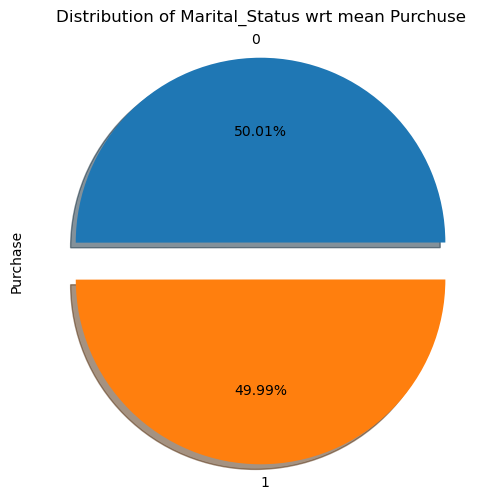

In [84]:
plt.figure(figsize=(6,6))
df.groupby('Marital_Status').mean()['Purchase'].plot.pie(explode=[0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title("Distribution of Marital_Status wrt mean Purchuse")
plt.show()

Most of the customer are unmarried. And Their purchase rate is more.

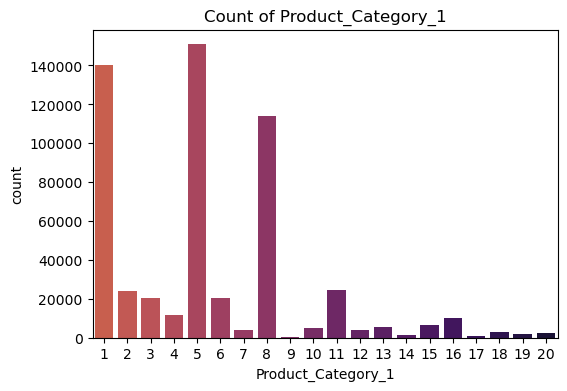

In [85]:
# Product_Category_1	 

plt.figure(figsize=(6,4))
color = list(cm.inferno_r(np.linspace(.4, .9, 20)))
sns.countplot(data= df, x= 'Product_Category_1',hue= 'Product_Category_1', palette=color, legend=False)
plt.title("Count of Product_Category_1")
plt.show()

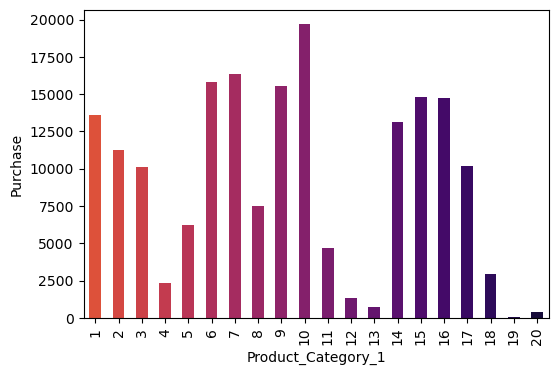

In [86]:
color = cm.inferno_r(np.linspace(.4, .9, 20))
plt.figure(figsize=(6,4))
df.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar', color=color)
plt.ylabel("Purchase")
plt.show()

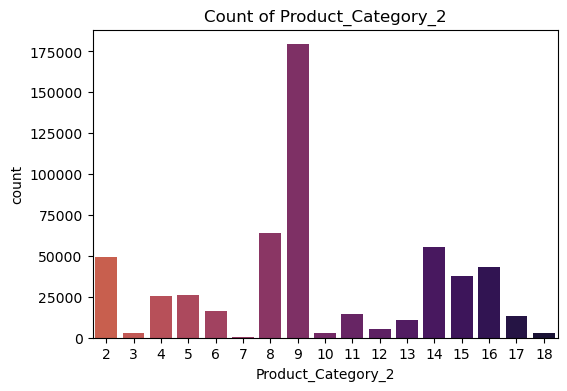

In [87]:
# Product_Category_2	 

df['Product_Category_2'] = df['Product_Category_2'].astype("int64")

plt.figure(figsize=(6,4))
color = list(cm.inferno_r(np.linspace(.4, .9, 17)))
sns.countplot(data= df, x= 'Product_Category_2',hue= 'Product_Category_2', palette=color, legend=False)
plt.title("Count of Product_Category_2")
plt.show()

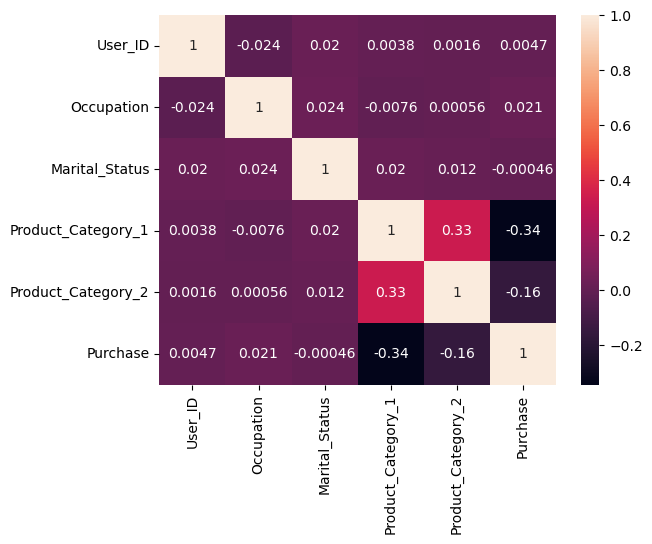

In [88]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [89]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

## Droping irrelavent columns


In [90]:
df.drop(['User_ID', 'Product_ID'], axis=1,inplace=True)

In [91]:
df.sample()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
14677,M,0-17,19,B,1,0,5,9,6917


## Encoding the categorical variables

In [92]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [93]:
df['Gender'] = lr.fit_transform(df['Gender'])

In [94]:
df['Age'] = lr.fit_transform(df['Age']) # Lable Encoding, because where categories naturally have an order.


In [95]:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years']) # One-Hot Encoding, because there is no inherent order among categories.


In [96]:
df = pd.get_dummies(df, columns=['City_Category'])

In [97]:
df.head(7)

,Gender,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,City_Category_A,City_Category_B,City_Category_C
0,0,0,10,0,3,9,8370,0,0,1,0,0,1,0,0
1,0,0,10,0,1,6,15200,0,0,1,0,0,1,0,0
2,0,0,10,0,12,9,1422,0,0,1,0,0,1,0,0
3,0,0,10,0,12,14,1057,0,0,1,0,0,1,0,0
4,1,6,16,0,8,9,7969,0,0,0,0,1,0,0,1
5,1,2,15,0,1,2,15227,0,0,0,1,0,1,0,0
6,1,4,7,1,1,8,19215,0,0,1,0,0,0,1,0


In [98]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase', 'Stay_In_Current_City_Years_0',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+',
       'City_Category_A', 'City_Category_B', 'City_Category_C'],
      dtype='object')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   Gender                         550068 non-null  int32
 1   Age                            550068 non-null  int32
 2   Occupation                     550068 non-null  int64
 3   Marital_Status                 550068 non-null  int64
 4   Product_Category_1             550068 non-null  int64
 5   Product_Category_2             550068 non-null  int64
 6   Purchase                       550068 non-null  int64
 7   Stay_In_Current_City_Years_0   550068 non-null  uint8
 8   Stay_In_Current_City_Years_1   550068 non-null  uint8
 9   Stay_In_Current_City_Years_2   550068 non-null  uint8
 10  Stay_In_Current_City_Years_3   550068 non-null  uint8
 11  Stay_In_Current_City_Years_4+  550068 non-null  uint8
 12  City_Category_A                550068 non-null  uint8
 13 

## Splitting data into independent and dependent variables

In [100]:
X = df.drop("Purchase",axis=1)
y=df['Purchase'].values

In [101]:
X.head(3)

,Gender,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,City_Category_A,City_Category_B,City_Category_C
0,0,0,10,0,3,9,0,0,1,0,0,1,0,0
1,0,0,10,0,1,6,0,0,1,0,0,1,0,0
2,0,0,10,0,12,9,0,0,1,0,0,1,0,0


In [102]:
y

array([ 8370, 15200,  1422, ...,   137,   365,   490], dtype=int64)

## Spliting the dataset into Train and Test Set 

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Modeling

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score


In [105]:
lin_reg = LinearRegression()
dt_reg = DecisionTreeRegressor(max_depth= 10, min_samples_leaf= 4, min_samples_split= 10)
rf_reg = RandomForestRegressor(random_state = 0)
xg_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

In [106]:
clrs = {'Linear Regression' : lin_reg, 'DecisionTree Regressor' : dt_reg, 'RandomForest Regressor' : rf_reg, 'XGB Regressor' : xg_reg}

In [107]:
def train_regressor(clr, X_train, y_train, X_test, y_test):
    clr.fit(X_train, y_train)
    y_pred = clr.predict(X_test)

    m_a_err = mean_absolute_error(y_test, y_pred)
    m_s_err = mean_squared_error(y_test, y_pred)
    r2_s = r2_score(y_test, y_pred)

    return m_a_err, m_s_err, r2_s 

In [108]:
mae = []
mse = []
r2 = []

for name, clr in clrs.items():
    m_a_err, m_s_err, r2_s = train_regressor(clr, X_train, y_train, X_test, y_test)

    mae.append(m_a_err)
    mse.append(m_s_err)
    r2.append(r2_s)

In [109]:
performance_df = pd.DataFrame({'Algorithm' : clrs.keys(), 'Mean Absolute Error': mae, 'Mean Squared Error' : mse, 'R2 Score' : r2})

In [110]:
performance_df.round(2)

,Algorithm,Mean Absolute Error,Mean Squared Error,R2 Score
0,Linear Regression,3596.95,22073064.24,0.13
1,DecisionTree Regressor,2235.79,8865451.86,0.65
2,RandomForest Regressor,2195.73,8995948.15,0.64
3,XGB Regressor,2165.10,8434823.67,0.67


#### From these results, We can say `XGBoost Regressor` performs the best among the evaluated models, as it has the lowest Mean Absolute Error, Mean Squared Error, and the highest R2 Score.